<a href="https://colab.research.google.com/github/daniloc7/Colab_RedesNeurais/blob/main/ClassImg_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2), strides=2),

  tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
  tf.keras.layers.MaxPooling2D((2, 2), strides=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 100)               4

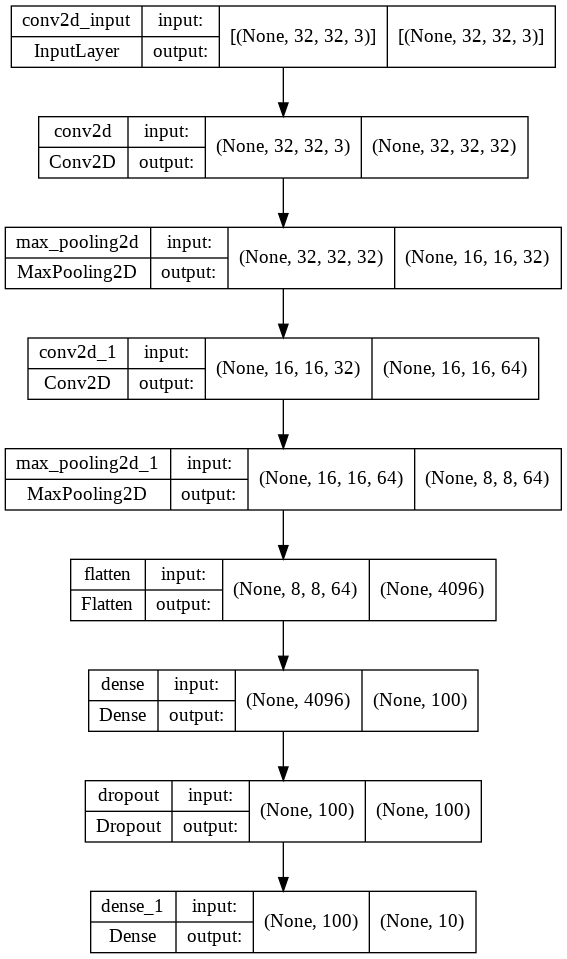

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
callbacks = [
             EarlyStopping(patience=2)
]

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

In [ ]:
callbacks = [
             EarlyStopping(patience=2),
             model_checkpoint_callback,
]

In [ ]:
history = model.fit(X_train,y_train, epochs=10,validation_data=(X_test,y_test),callbacks=callbacks)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 98s 62ms/step - loss: 1.4820 - accuracy: 0.4644 - val_loss: 1.1982 - val_accuracy: 0.5736
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1219 - accuracy: 0.6021 - val_loss: 1.0211 - val_accuracy: 0.6421
Epoch 3/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.9961 - accuracy: 0.6489 - val_loss: 0.9795 - val_accuracy: 0.6547
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.9109 - accuracy: 0.6760 - val_loss: 0.9110 - val_accuracy: 0.6818
Epoch 5/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8374 - accuracy: 0.7028 - val_loss: 0.9226 - val_accuracy: 0.6790
Epoch 6/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.7765 - accuracy: 0.7224 - val_loss: 0.9154 - val_accuracy: 0.6852


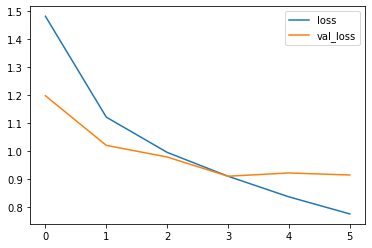

In [ ]:
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot();

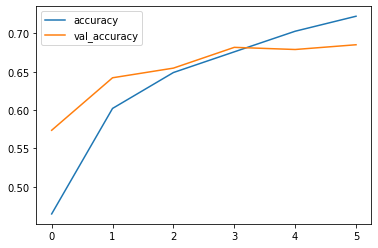

In [ ]:
metrics_df[["accuracy","val_accuracy"]].plot();